# SSPS project

In [4]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings


In [5]:
# Load data
ds=pd.read_csv('Fats3.csv')

In [6]:
# Show head
ds.head()

,alim_grp_code,alim_grp_nom_eng,Fat (g/100g),FA saturated (g/100g),FA mono (g/100g),FA poly (g/100g),Cholesterol (mg/100g)
0,2,"fruits, vegetables, legumes and nuts",0.23,0.055,0.003,0.120,0.0
1,2,"fruits, vegetables, legumes and nuts",0.25,0.061,0.005,0.110,0.0
2,2,"fruits, vegetables, legumes and nuts",0.70,0.240,0.140,0.250,0.0
3,2,"fruits, vegetables, legumes and nuts",0.11,0.035,0.004,0.038,0.0
4,2,"fruits, vegetables, legumes and nuts",0.26,0.061,0.013,0.084,0.0


In [7]:
ds.shape

(597, 7)

In [8]:
ds.dtypes

alim_grp_code              int64
alim_grp_nom_eng          object
Fat (g/100g)             float64
FA saturated (g/100g)    float64
FA mono (g/100g)         float64
FA poly (g/100g)         float64
Cholesterol (mg/100g)    float64
dtype: object

# Check and treat null values

<AxesSubplot:>

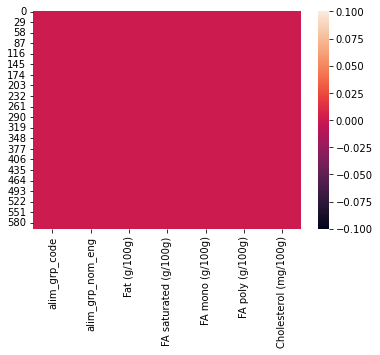

In [9]:
# Show missing data
sns.heatmap(ds.isnull())

In [10]:
ds.isnull().sum()

alim_grp_code            0
alim_grp_nom_eng         0
Fat (g/100g)             0
FA saturated (g/100g)    0
FA mono (g/100g)         0
FA poly (g/100g)         0
Cholesterol (mg/100g)    0
dtype: int64

In [11]:
ds.columns

Index(['alim_grp_code', 'alim_grp_nom_eng', 'Fat (g/100g)',
       'FA saturated (g/100g)', 'FA mono (g/100g)', 'FA poly (g/100g)',
       'Cholesterol (mg/100g)'],
      dtype='object')

# Standard Scaler

In [12]:
# Remove classifying columns in order to standard scale the numerical data
nds_x=ds.drop(columns=['alim_grp_code', 'alim_grp_nom_eng'])
y=ds[['alim_grp_code', 'alim_grp_nom_eng']]

In [13]:
#Scaling for linear regression

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [14]:
# Recombine the scaled data and the classifying columns
# Reset datasets to avoid NAN
x.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
scds = pd.concat([y,x], axis=1)

In [15]:
scds.shape

(597, 7)

# Check correlation

<AxesSubplot:>

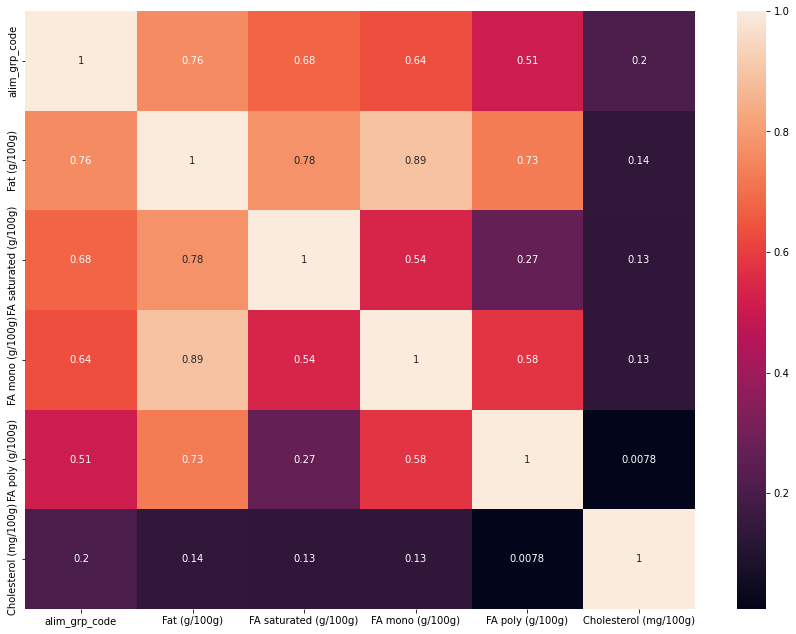

In [16]:
plt.figure(figsize = (15,11))
dscor=scds.corr()
sns.heatmap(dscor, annot=True)

# Summary statistics

In [17]:
ds.describe()

,alim_grp_code,Fat (g/100g),FA saturated (g/100g),FA mono (g/100g),FA poly (g/100g),Cholesterol (mg/100g)
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,3.539363,15.559616,4.966364,6.111547,3.334499,73.895475
std,1.894147,25.528989,10.511327,11.164380,8.395038,173.185307
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.420000,0.081000,0.039000,0.160000,0.000000
50%,4.000000,4.380000,1.320000,1.360000,0.610000,26.200000
75%,4.000000,16.100000,4.960000,6.450000,2.670000,78.000000
max,9.000000,100.000000,86.500000,75.400000,69.600000,2320.000000


# Data visualizations

In [18]:
scds.columns

Index(['alim_grp_code', 'alim_grp_nom_eng', 'Fat (g/100g)',
       'FA saturated (g/100g)', 'FA mono (g/100g)', 'FA poly (g/100g)',
       'Cholesterol (mg/100g)'],
      dtype='object')

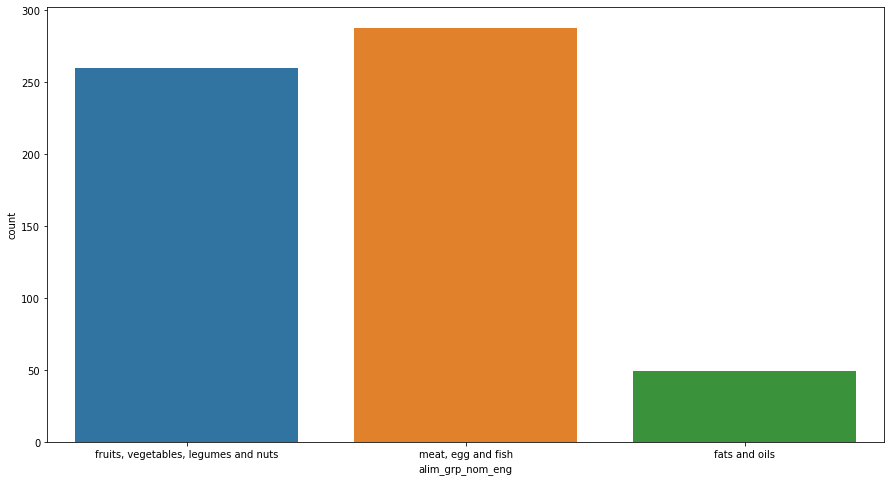

In [19]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x=scds['alim_grp_nom_eng'])



# Remove outliers

In [20]:
scds.shape

(597, 7)

In [21]:
scds.columns

Index(['alim_grp_code', 'alim_grp_nom_eng', 'Fat (g/100g)',
       'FA saturated (g/100g)', 'FA mono (g/100g)', 'FA poly (g/100g)',
       'Cholesterol (mg/100g)'],
      dtype='object')

In [22]:
nds=scds.drop(columns=['alim_grp_nom_eng'])

In [23]:
nds.shape

(597, 6)

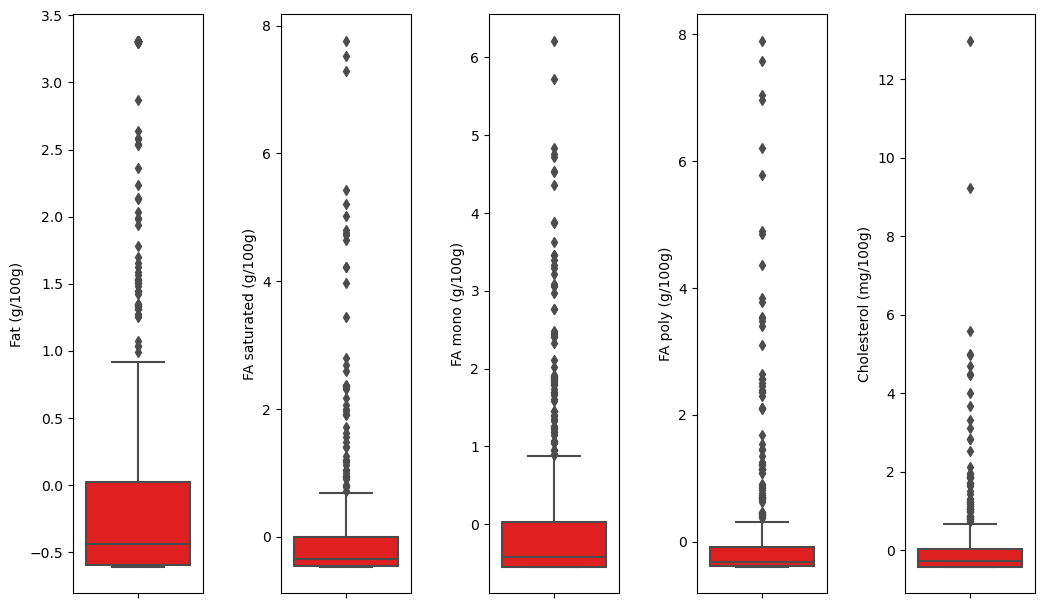

In [55]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=6
nrows=10

plt.figure(figsize=(2*ncol,10*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [25]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(597, 6)
(544, 6)


# Check skewness

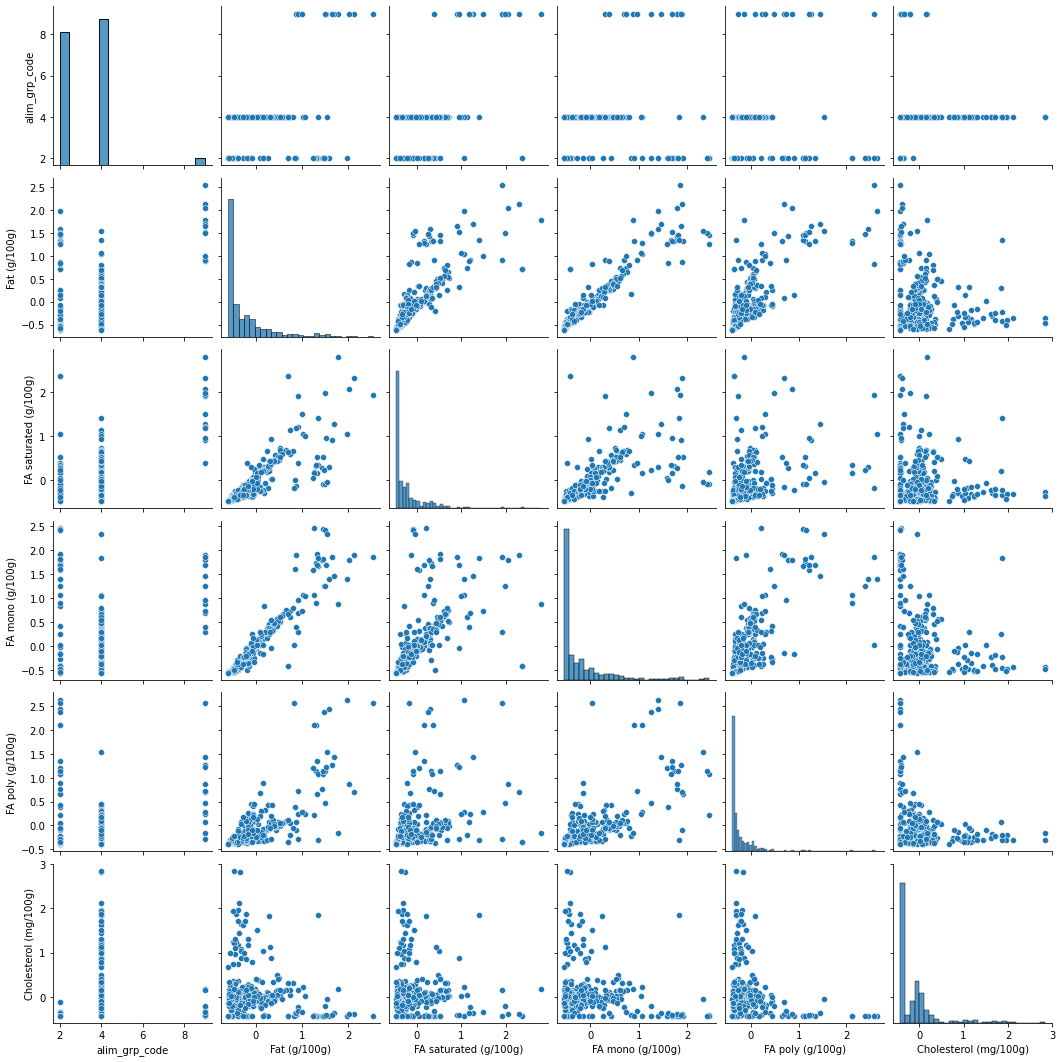

In [26]:
# Checking pairplots
sns.pairplot(cds)
plt.show()

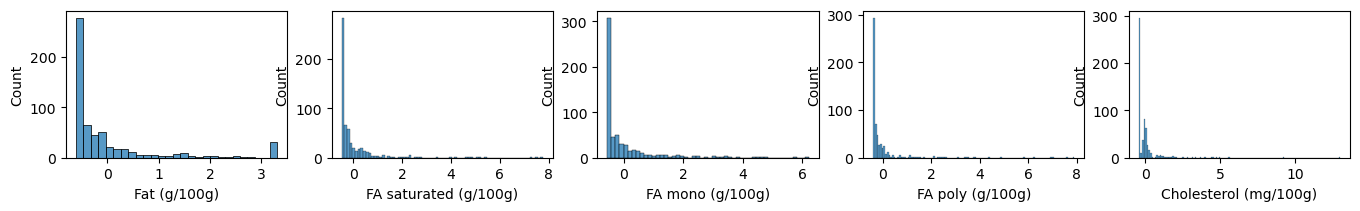

In [59]:
# Show distribution plots for all columns
collist=cds.columns.values
ncol=6
nrows=10

plt.figure(figsize=(20,23))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(nds[collist[i]])

In [28]:
# Show skewness (less than 0.55 is ok)
cds.skew()

alim_grp_code            1.734130
Fat (g/100g)             2.211981
FA saturated (g/100g)    3.011673
FA mono (g/100g)         2.471576
FA poly (g/100g)         4.069745
Cholesterol (mg/100g)    2.748482
dtype: float64

In [29]:
# Show skewness (less than 0.55 is ok)
cds.skew()

alim_grp_code            1.734130
Fat (g/100g)             2.211981
FA saturated (g/100g)    3.011673
FA mono (g/100g)         2.471576
FA poly (g/100g)         4.069745
Cholesterol (mg/100g)    2.748482
dtype: float64

<AxesSubplot:xlabel='Fat (g/100g)', ylabel='FA saturated (g/100g)'>

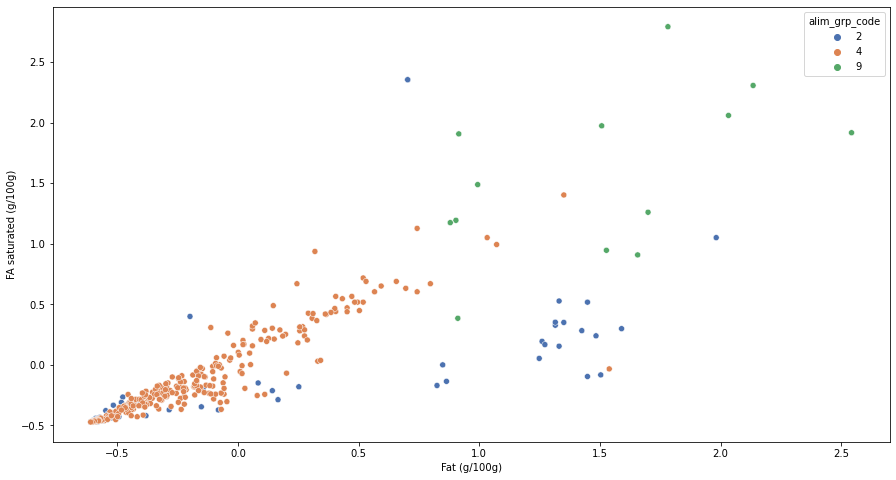

In [30]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="Fat (g/100g)", y="FA saturated (g/100g)", hue='alim_grp_code', palette="deep")


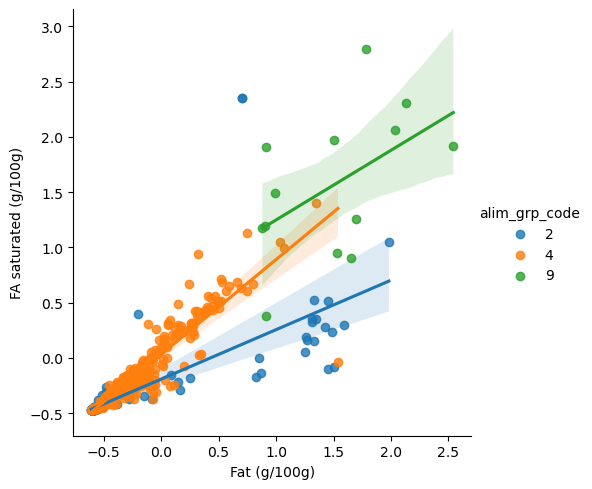

In [31]:
# Linear - Line of best fit

plt.rcParams.update({'figure.figsize':(12,12), 'figure.dpi':100})
sns.lmplot(x="Fat (g/100g)", y="FA saturated (g/100g)", hue='alim_grp_code', data=cds);

<AxesSubplot:xlabel='Fat (g/100g)', ylabel='FA mono (g/100g)'>

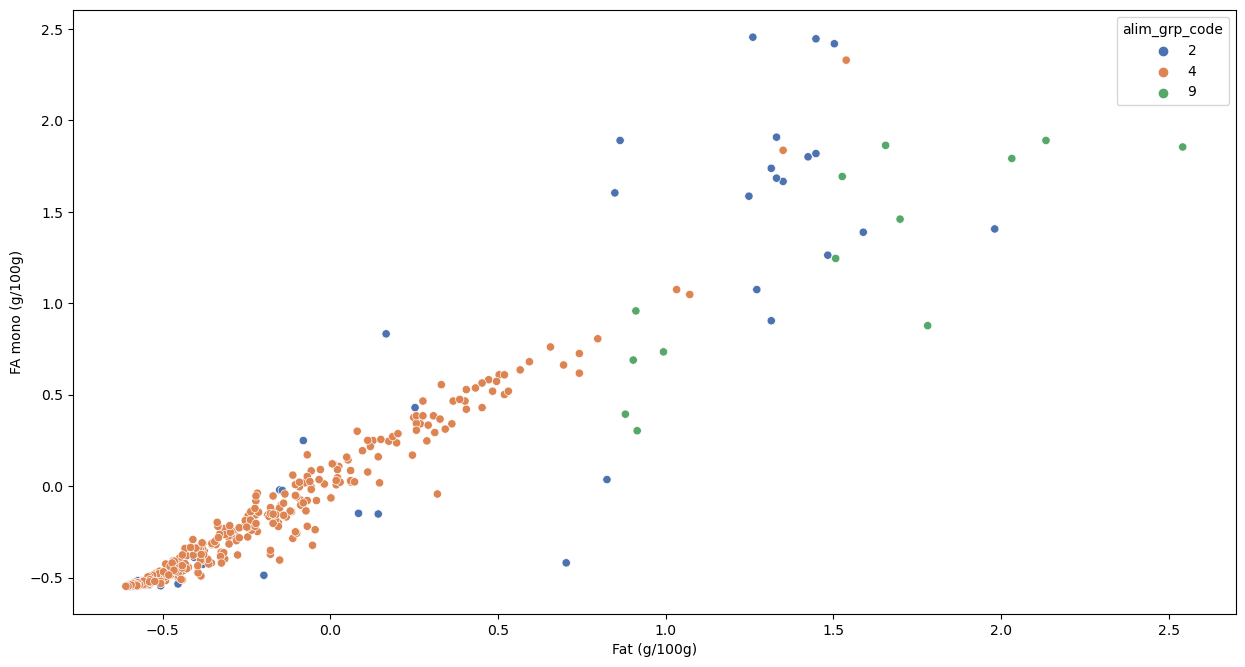

In [32]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="Fat (g/100g)", y="FA mono (g/100g)", hue='alim_grp_code', palette="deep")


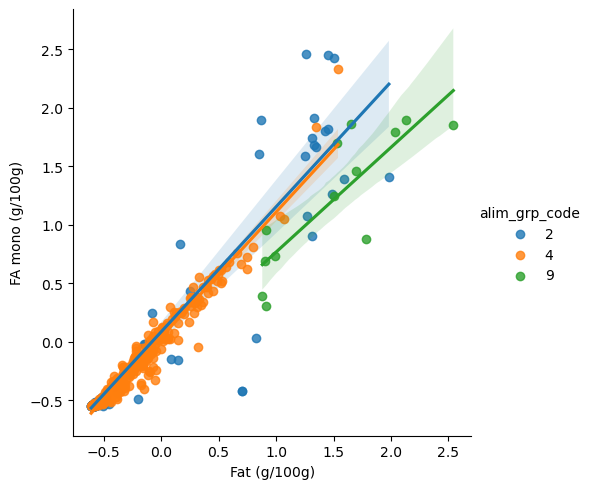

In [33]:
# Linear - Line of best fit

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
sns.lmplot(x="Fat (g/100g)", y="FA mono (g/100g)", hue='alim_grp_code', data=cds);

<AxesSubplot:xlabel='Fat (g/100g)', ylabel='FA poly (g/100g)'>

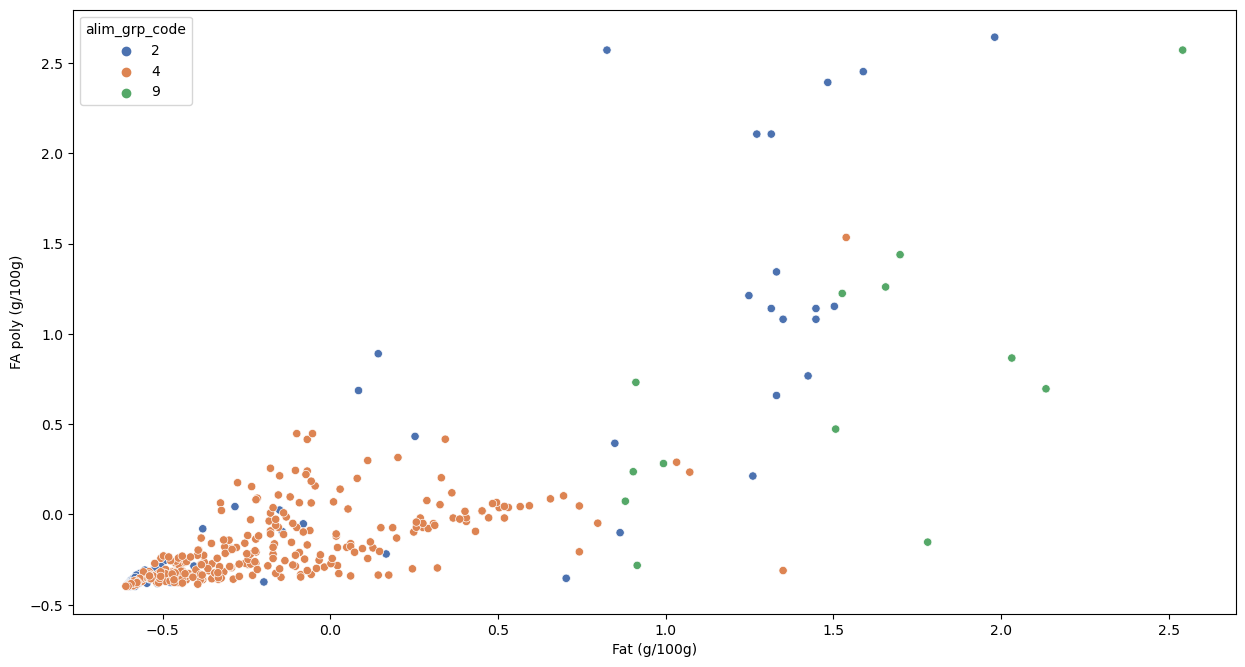

In [34]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="Fat (g/100g)", y="FA poly (g/100g)", hue='alim_grp_code', palette="deep")


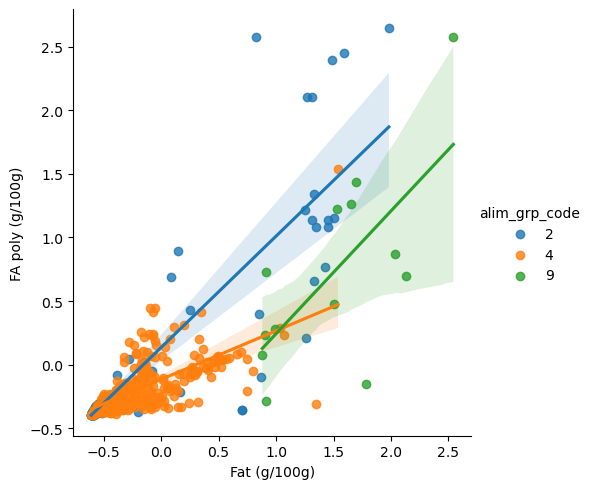

In [35]:
# Linear - Line of best fit

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
sns.lmplot(x="Fat (g/100g)", y="FA poly (g/100g)", hue='alim_grp_code', data=cds);

<AxesSubplot:xlabel='Fat (g/100g)', ylabel='Cholesterol (mg/100g)'>

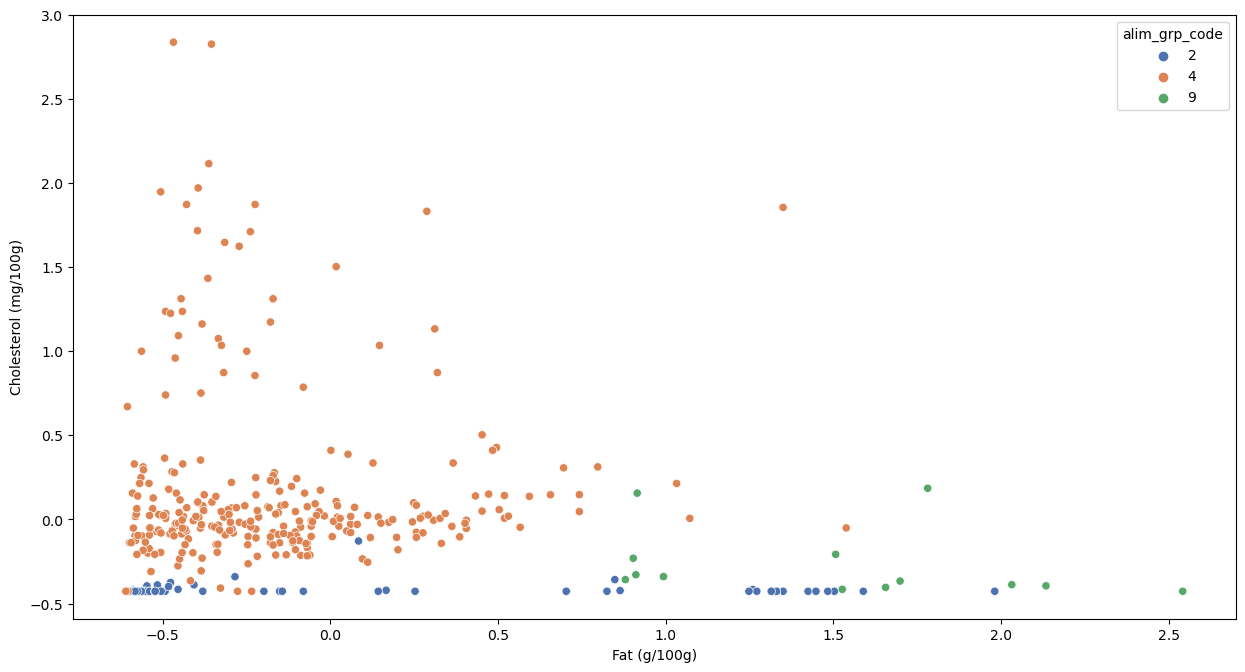

In [36]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="Fat (g/100g)", y="Cholesterol (mg/100g)", hue='alim_grp_code', palette="deep")


<AxesSubplot:xlabel='FA saturated (g/100g)', ylabel='FA mono (g/100g)'>

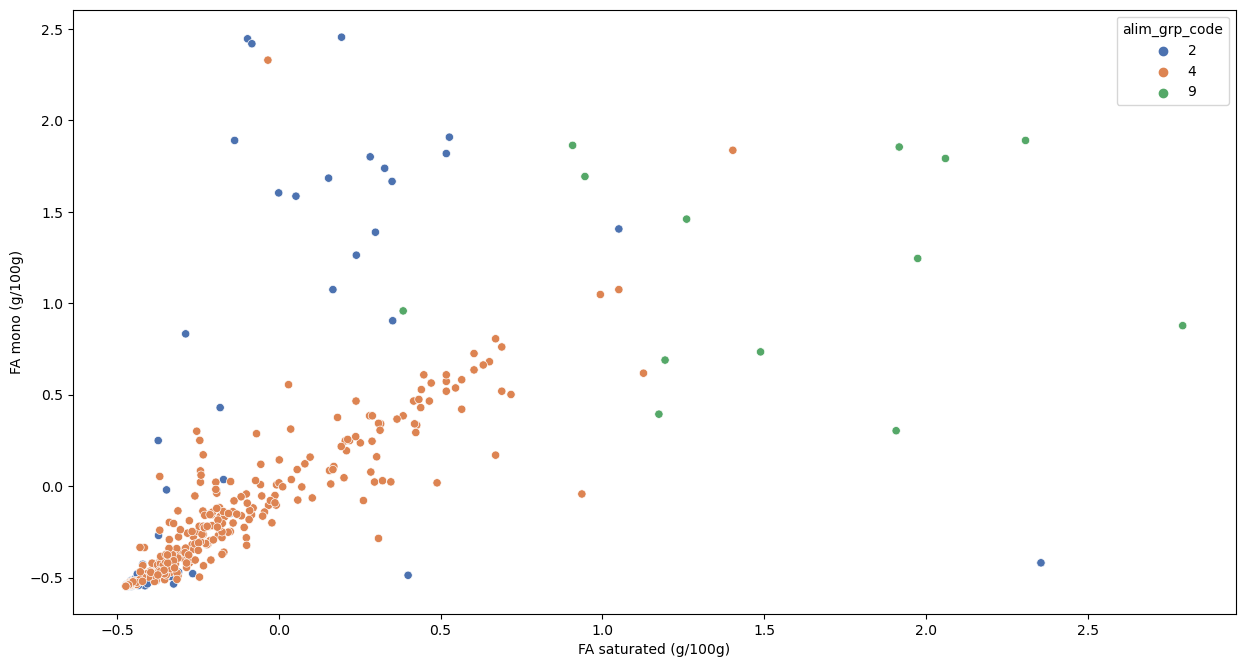

In [37]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="FA saturated (g/100g)", y="FA mono (g/100g)", hue='alim_grp_code', palette="deep")


<AxesSubplot:xlabel='FA saturated (g/100g)', ylabel='FA poly (g/100g)'>

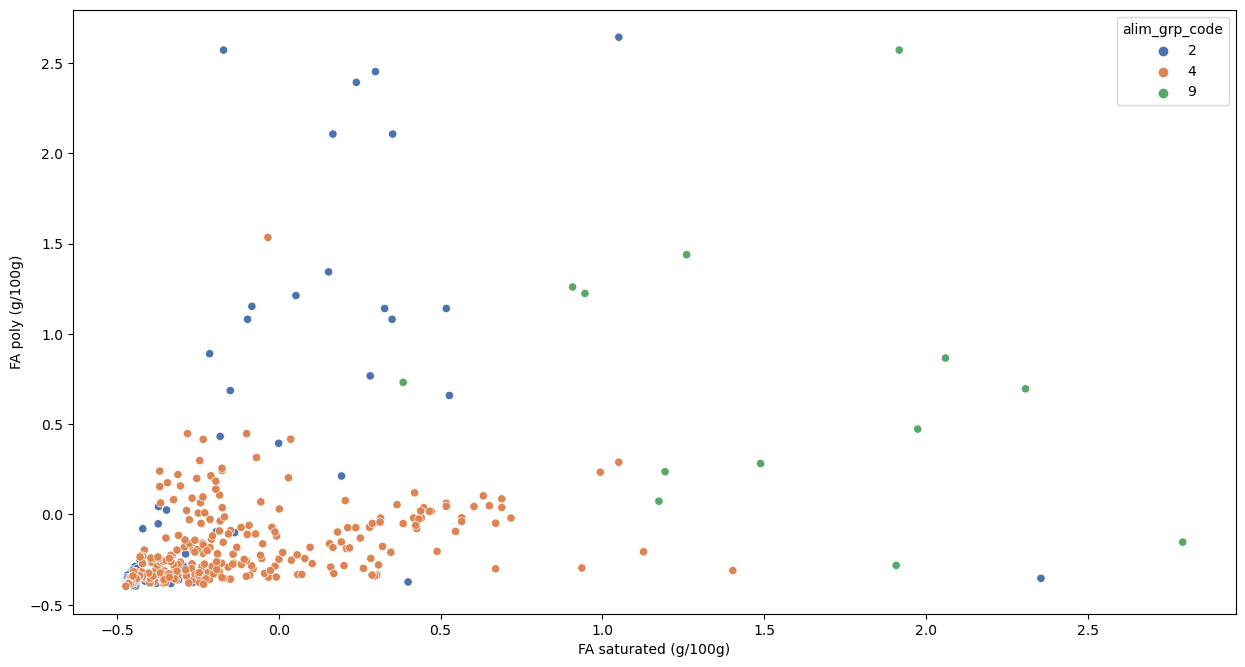

In [38]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="FA saturated (g/100g)", y="FA poly (g/100g)", hue='alim_grp_code', palette="deep")


<AxesSubplot:xlabel='FA saturated (g/100g)', ylabel='Cholesterol (mg/100g)'>

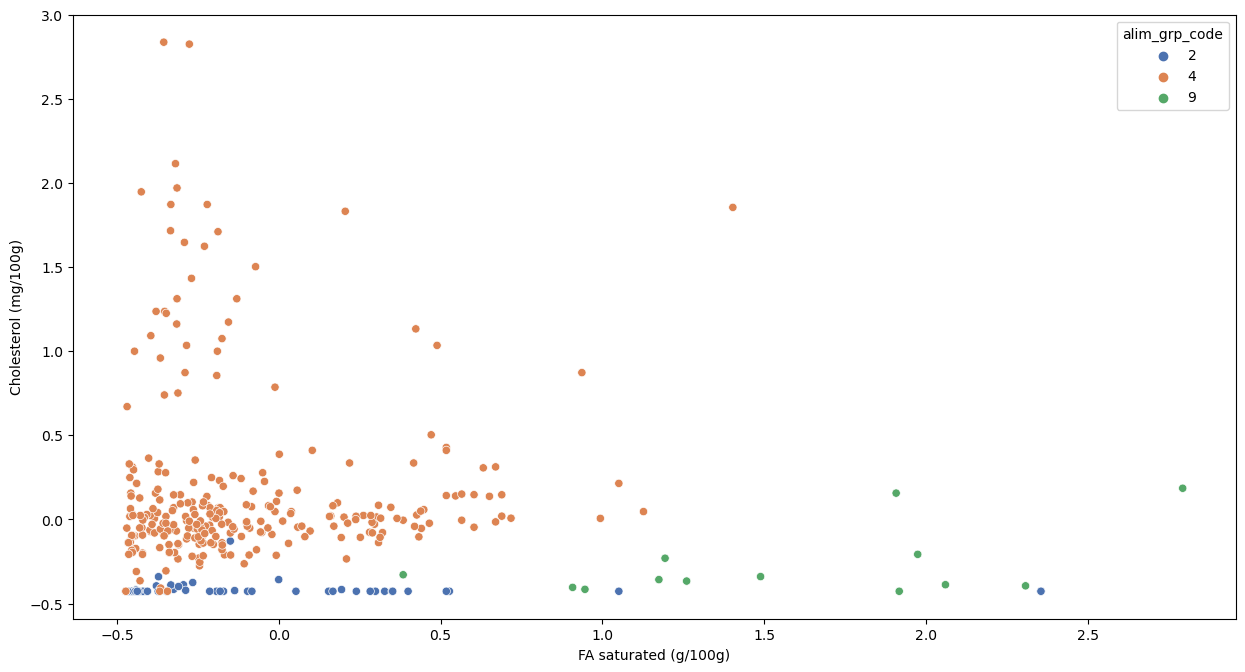

In [39]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="FA saturated (g/100g)", y="Cholesterol (mg/100g)", hue='alim_grp_code', palette="deep")


<AxesSubplot:xlabel='FA mono (g/100g)', ylabel='FA poly (g/100g)'>

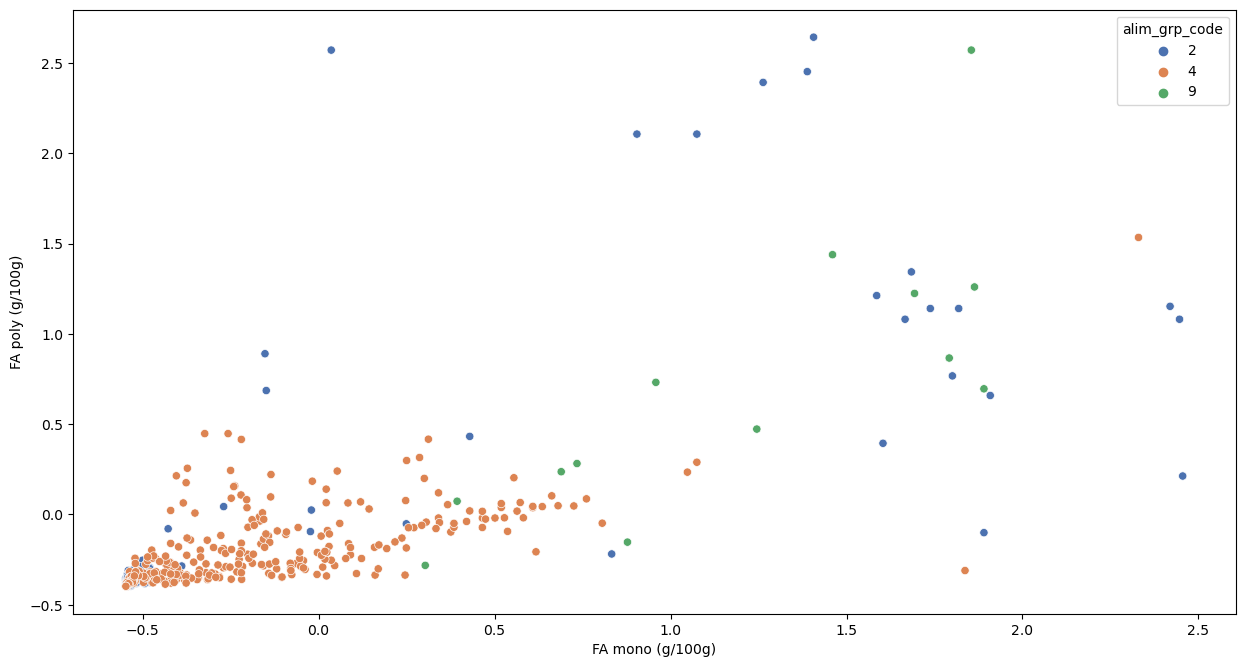

In [40]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="FA mono (g/100g)", y="FA poly (g/100g)", hue='alim_grp_code', palette="deep")


<AxesSubplot:xlabel='FA mono (g/100g)', ylabel='Cholesterol (mg/100g)'>

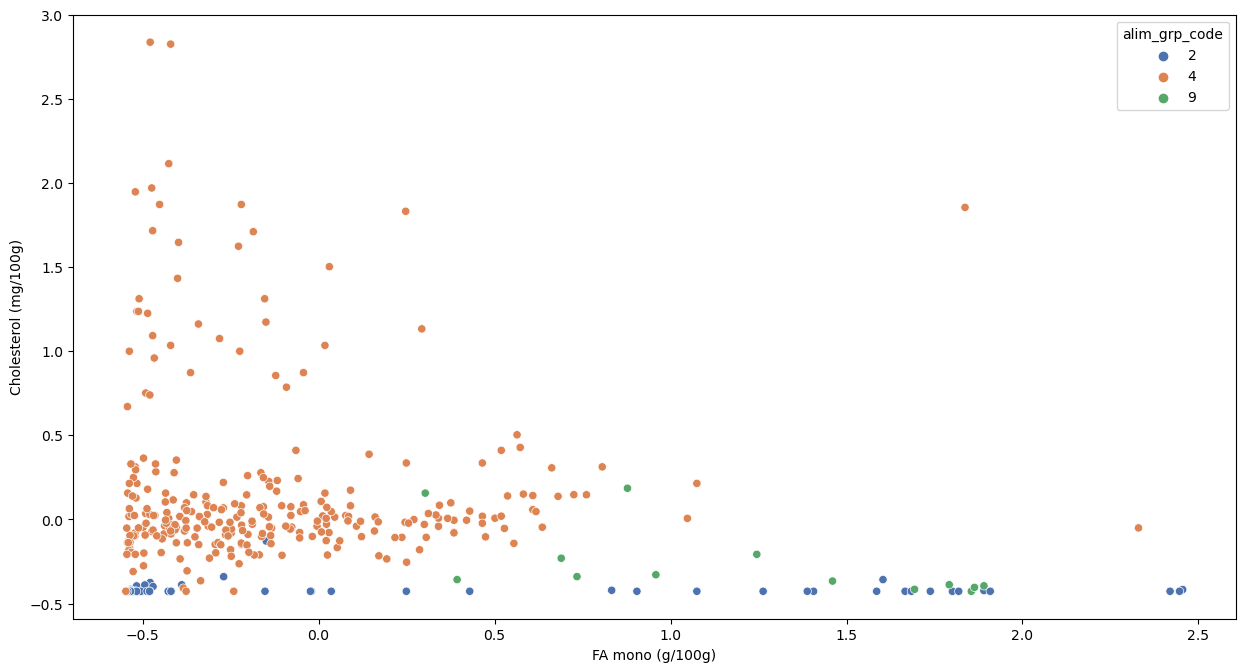

In [41]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="FA mono (g/100g)", y="Cholesterol (mg/100g)", hue='alim_grp_code', palette="deep")


<AxesSubplot:xlabel='FA poly (g/100g)', ylabel='Cholesterol (mg/100g)'>

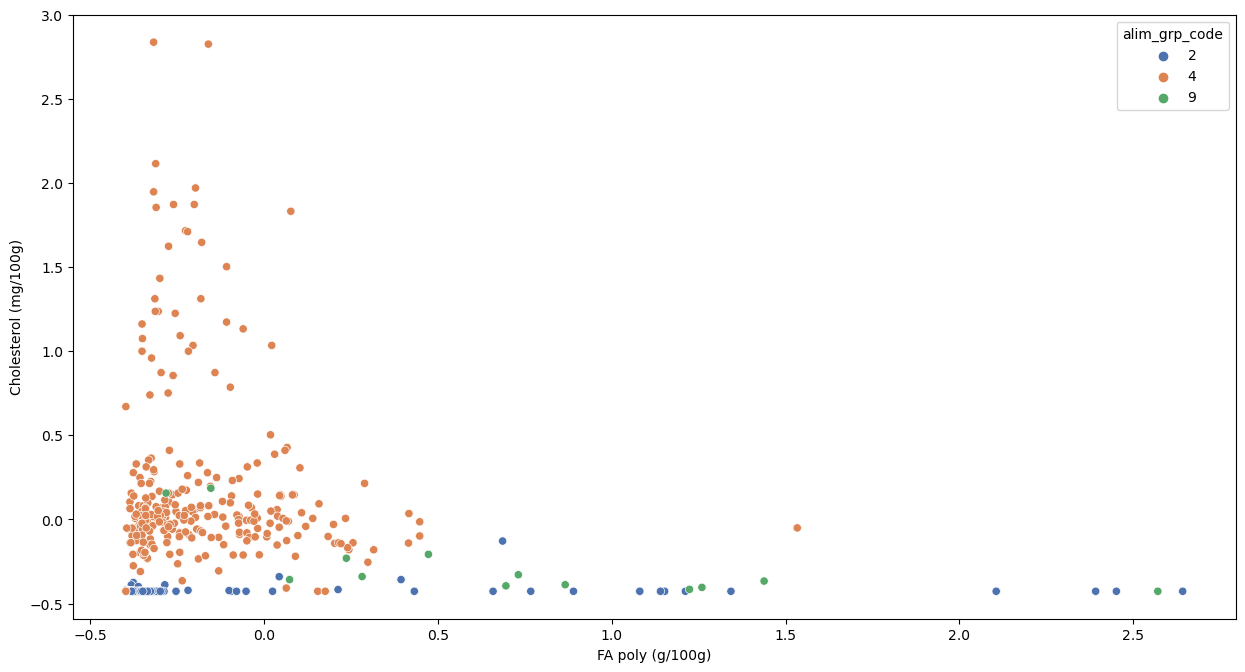

In [42]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=cds, x="FA poly (g/100g)", y="Cholesterol (mg/100g)", hue='alim_grp_code', palette="deep")

# Split data into x and y

In [43]:
cds.columns

Index(['alim_grp_code', 'Fat (g/100g)', 'FA saturated (g/100g)',
       'FA mono (g/100g)', 'FA poly (g/100g)', 'Cholesterol (mg/100g)'],
      dtype='object')

In [74]:
# Lineup target and input values
pcads_x=cds.drop(columns=['alim_grp_code'])
y=cds[['alim_grp_code']]


NameError: name 'false' is not defined

# Apply PCA to reduce the amount of x columns

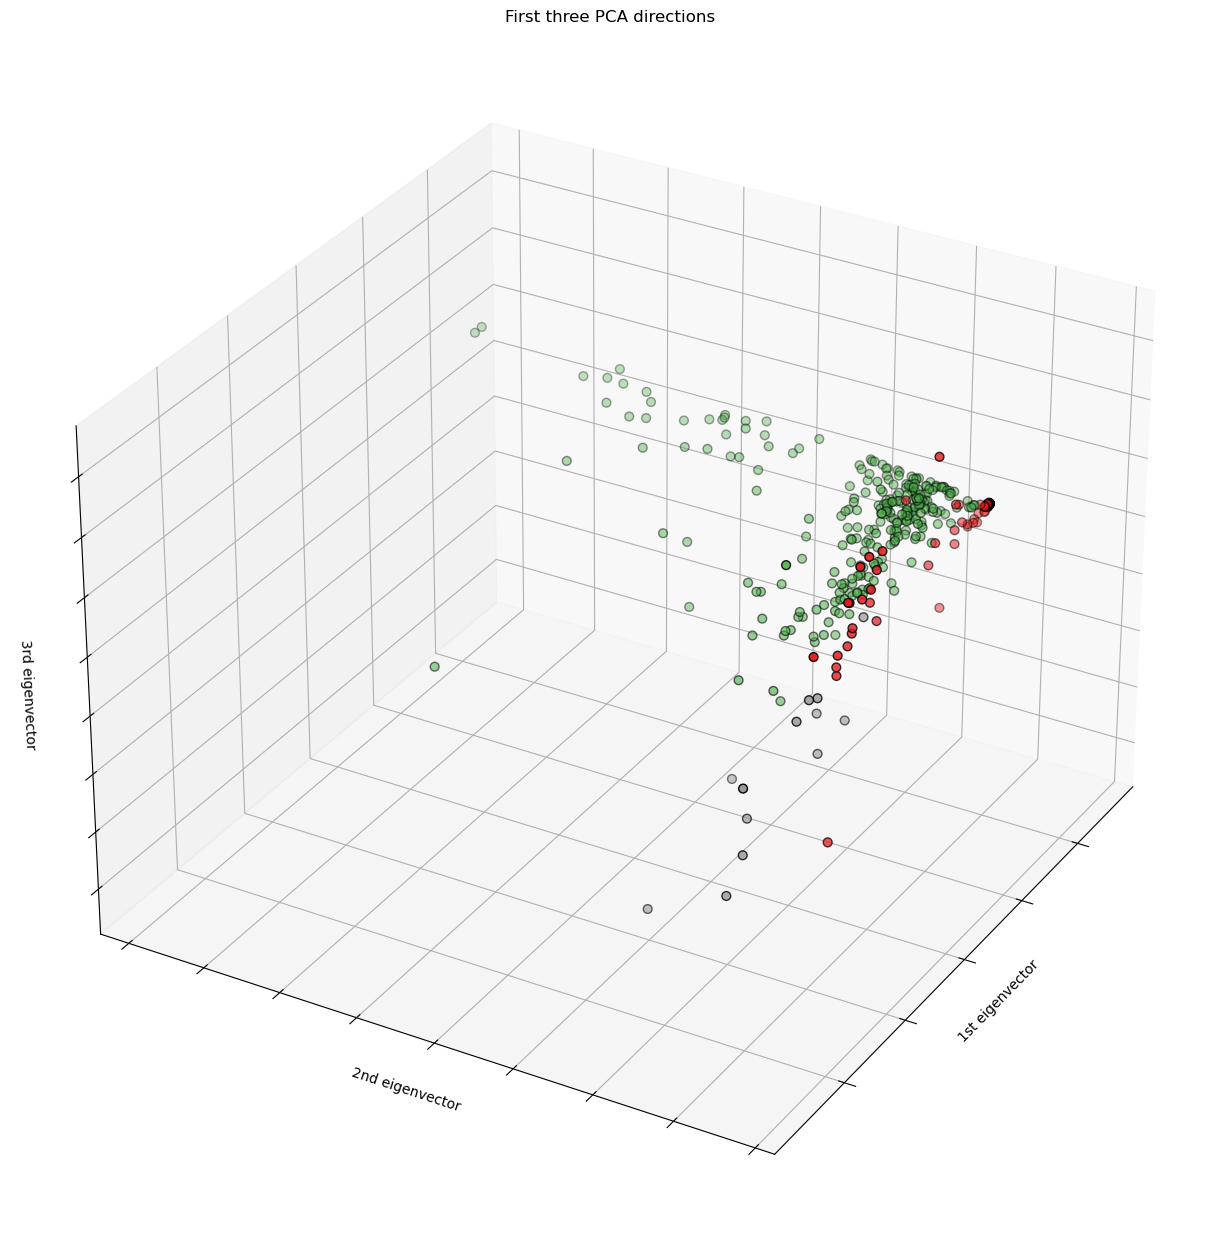

In [70]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(15, 12))
ax = Axes3D(fig, elev=-150, azim=150, auto_add_to_figure=False)
fig.add_axes(ax)
X_reduced = PCA(n_components=3).fit_transform(pcads_x)
ax.scatter(
    xs=X_reduced[:, 0],
    ys=X_reduced[:, 1],
    zs=X_reduced[:, 2],
    c=y['alim_grp_code'],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

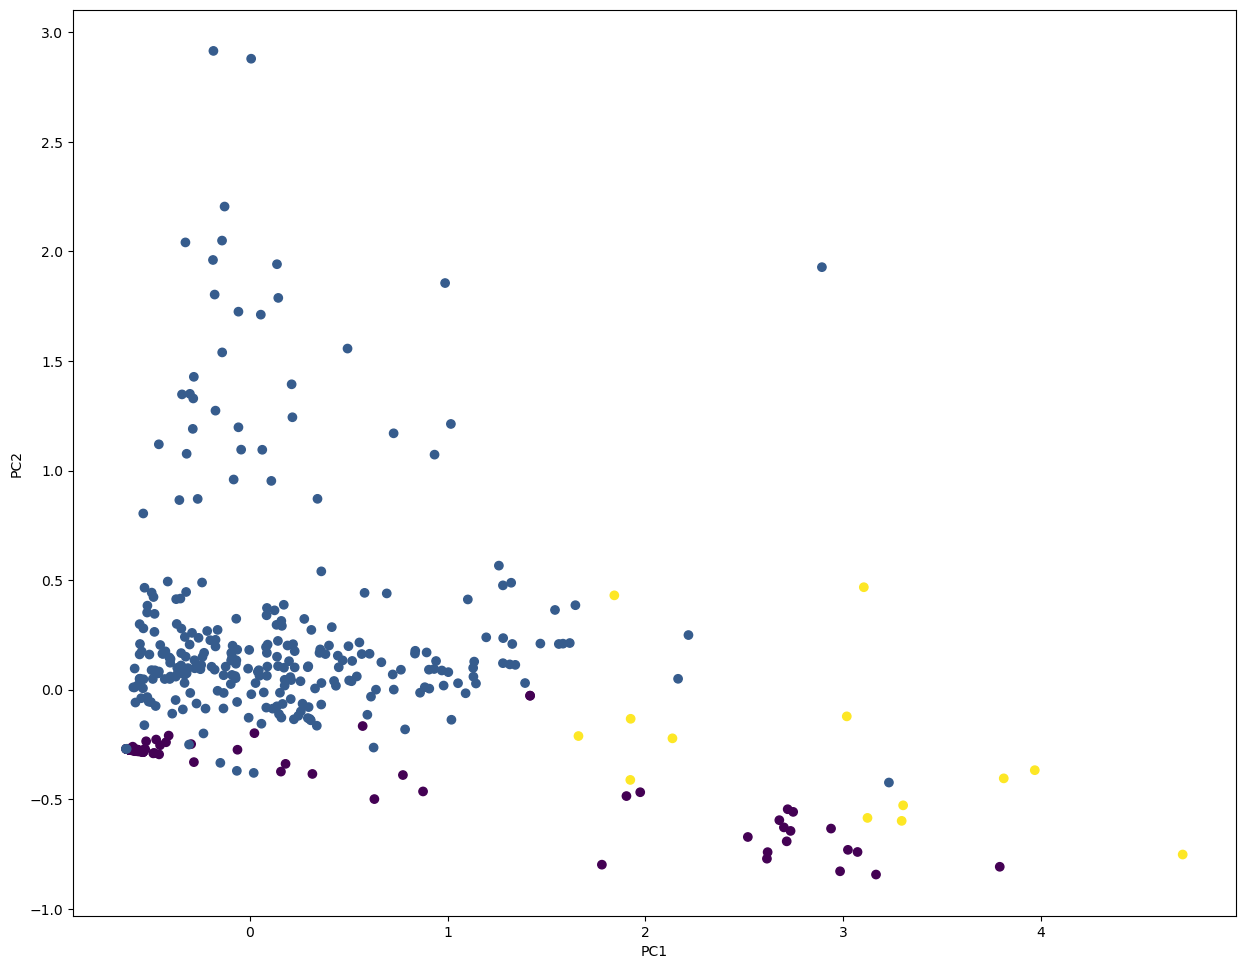

In [46]:
# Plot PCA PCs against each other
fig = plt.figure(1, figsize=(15, 12))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y['alim_grp_code'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

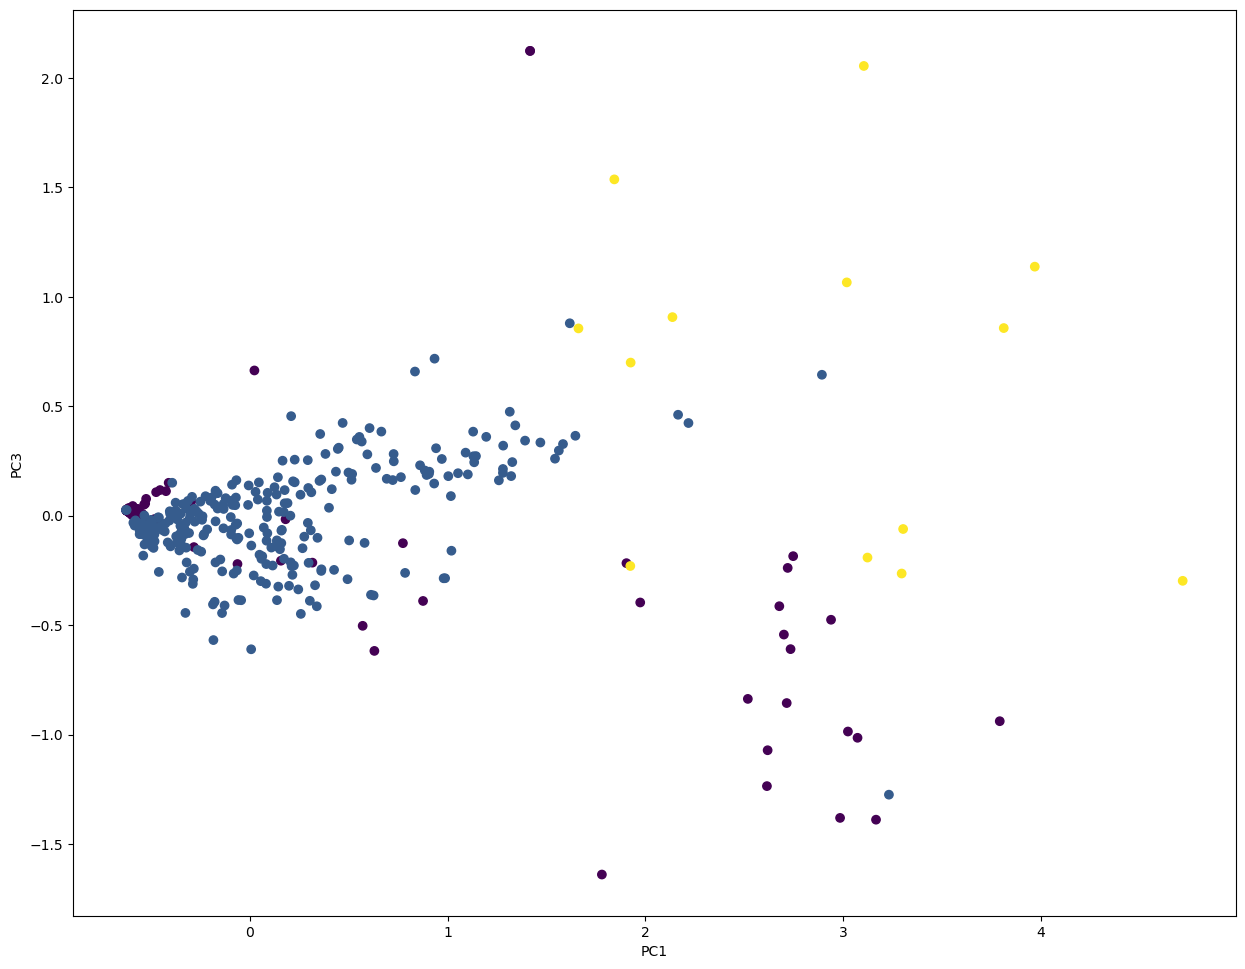

In [47]:
# Plot PCA PCs against each other
fig = plt.figure(1, figsize=(15, 12))
plt.scatter(X_reduced[:,0], X_reduced[:,2], c = y['alim_grp_code'])
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

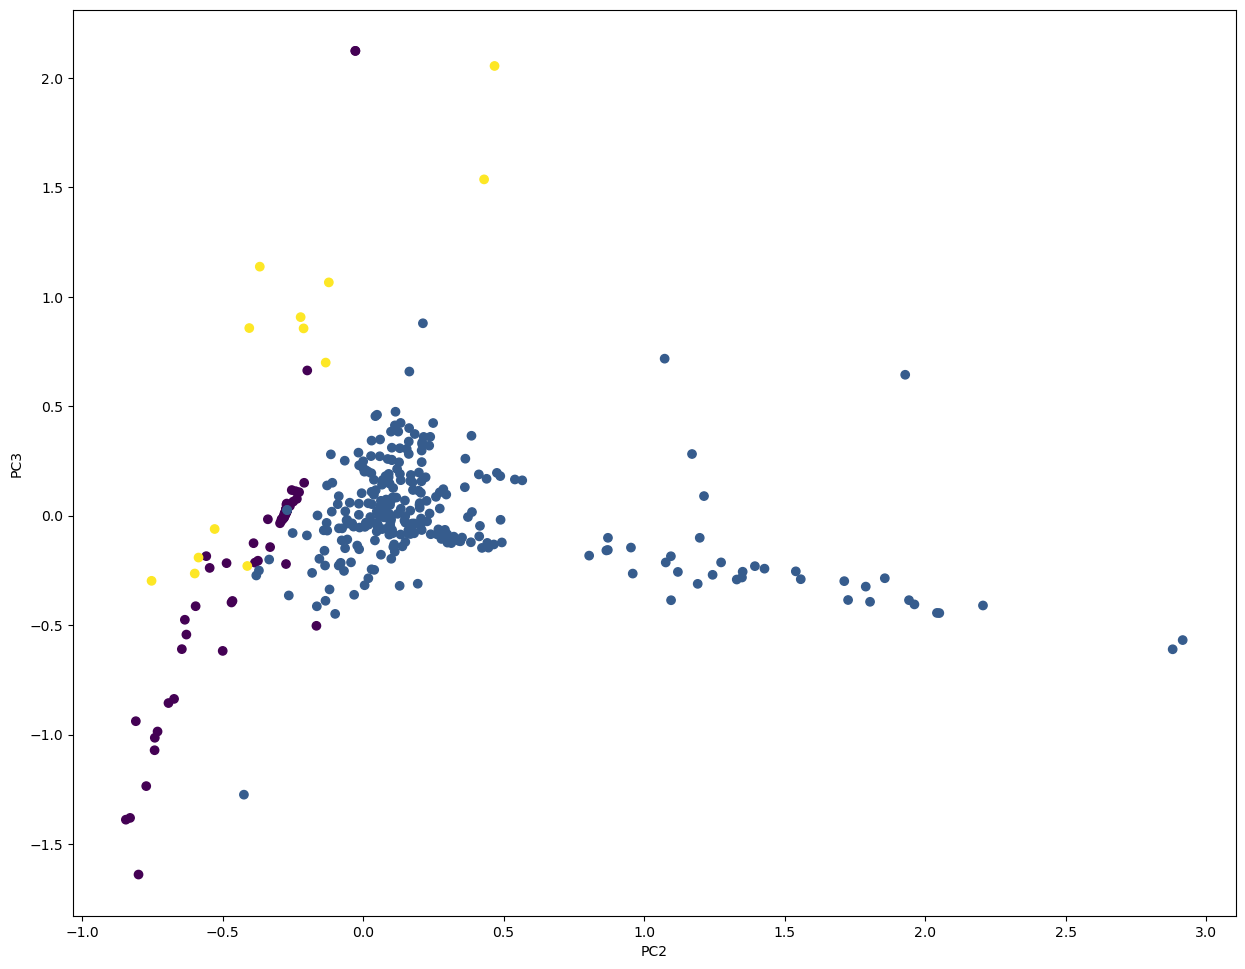

In [48]:
# Plot PCA PCs against each other
fig = plt.figure(1, figsize=(15, 12))
plt.scatter(X_reduced[:,1], X_reduced[:,2], c = y['alim_grp_code'])
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

# Train-Test split

In [49]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(pcads_x,y, random_state=55, test_size=0.20, stratify=cds['alim_grp_code'])

In [50]:
# summarize
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (435, 5) (435, 1)
Test (109, 5) (109, 1)


# Feature selection with ANOVA

Feature 0: 87.395589
Feature 1: 151.367824
Feature 2: 50.303503
Feature 3: 20.125406
Feature 4: 139.016725


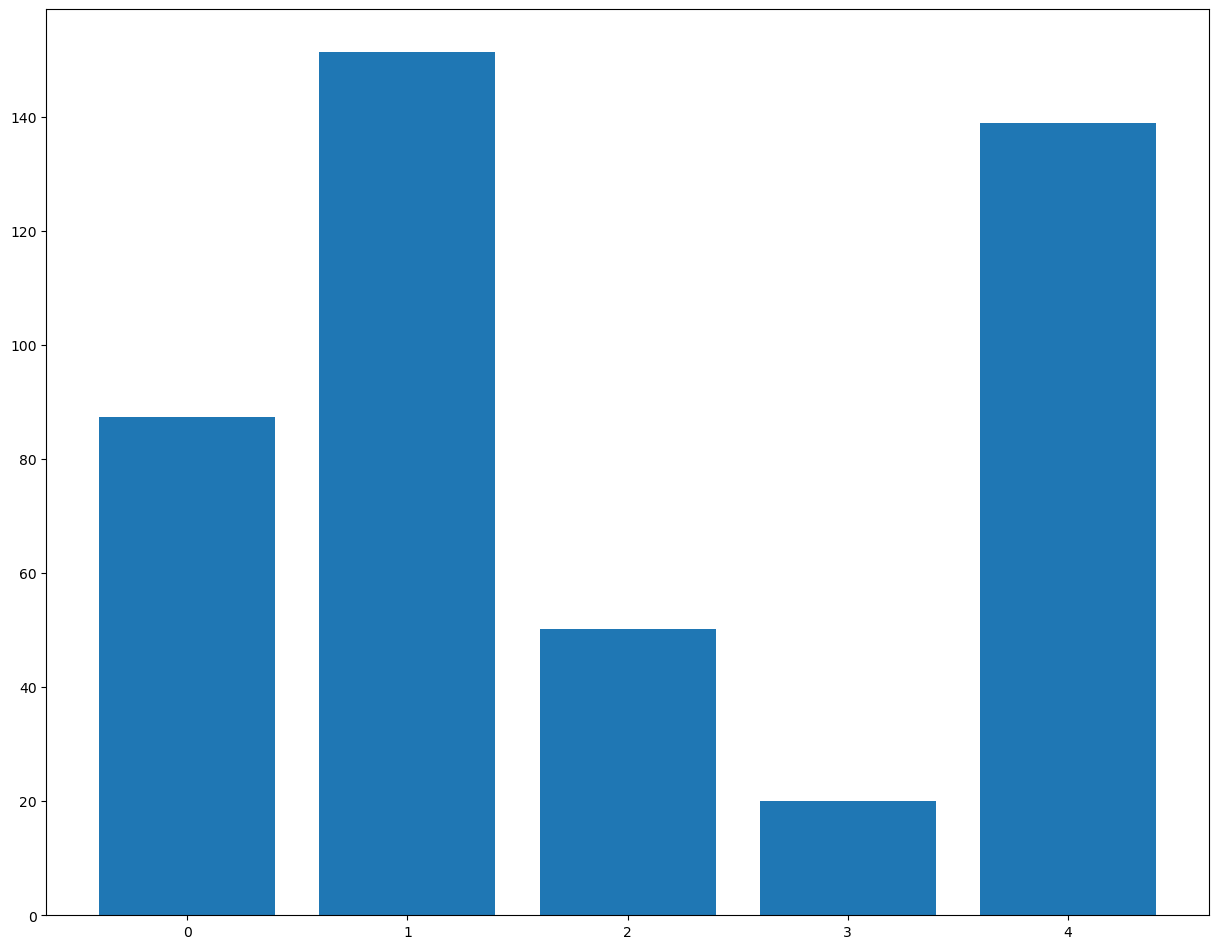

In [80]:
# example of anova f-test feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# change y_train into a 1D array
y_train = np.ravel(y_train)  

# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	x_train_fs = fs.transform(x_train)
	# transform test input data
	x_test_fs = fs.transform(x_test)
	return x_train_fs, x_test_fs, fs
 

# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)


# what are scores for the features
for i in  range(len(fs.scores_)):
	print('Feature %d: %f' % ( i, fs.scores_[i]))
    
# plot the scores
fig = plt.figure(1, figsize=(15, 12))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()